<a href="https://colab.research.google.com/github/ezahner/AI/blob/main/HW3/Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Author: Erin Zahner <br> AI: HW 3 - Problem 2<br> Search Algorithms</h3>

# **Problem 2**

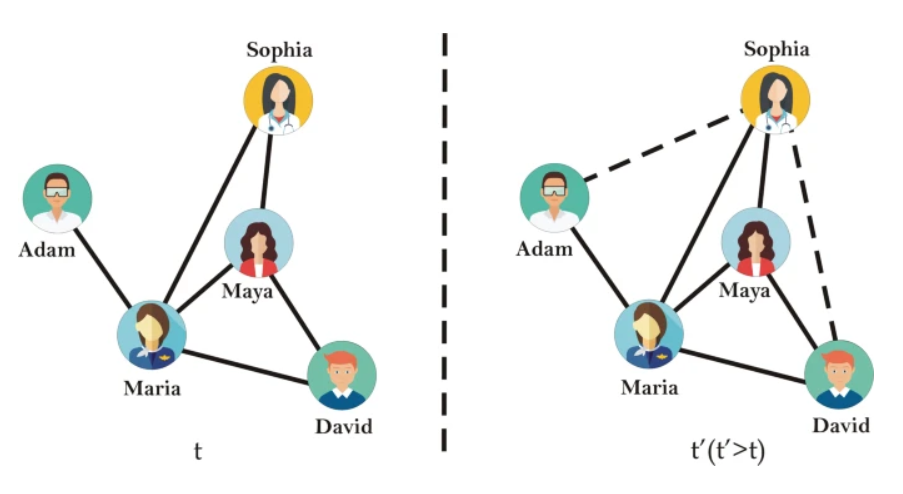
)

**Task:** Write an algorithm that uses BFS to discover potentially missing immediate connections in a network. For example, for the network G shown at time t:

* PotentialFriends(G, 'Adam') returns 'Sophia'
* PotentialFriends(G, 'David') returns 'Sophia'
* PotentialFriends(G, 'Sophia') returns 'Adam' and 'David'


In [4]:
from collections import deque

def PotentialFriends(graph, user):
    # Check if user exists
    if user not in graph:
        print(f"User {user} not found in the graph.")
        return set()

    potential_friends = set()
    visited = set()
    queue = deque([(user, 0)])

    while queue:
        current_user, level = queue.popleft()

        visited.add(current_user)

        # Explore immediate friends of the current user
        if level == 1:
            for friend in graph.get(current_user, []):
                if friend not in visited and friend not in graph[user]:
                    potential_friends.add(friend)

        # Explore friends at deeper levels
        else:
            for friend in graph.get(current_user, []):
                if friend not in visited:
                    queue.append((friend, level + 1))

    return potential_friends

In [5]:
t = {
  'Adam':   ['Maria'],
  'Maria':  ['Adam', 'Maya', 'David', 'Sophia'],
  'David':  ['Maria', 'Maya'],
  'Maya':   ['Maria', 'David', 'Sophia'],
  'Sophia': ['Maria', 'Maya']
}

In [8]:
print(PotentialFriends(t, 'Adam'))
print(PotentialFriends(t, 'David'))
print(PotentialFriends(t, 'Sophia'))

{'Sophia', 'David', 'Maya'}
{'Sophia', 'Adam'}
{'David', 'Adam'}
